In [3]:
pip install pandas


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.5 MB 1.2 MB/s eta 0:00:10
   ---------------------------------------- 0.1/11.5 MB 939.4 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.5 MB 1.2 MB/s eta 0:00:10
    --------------------------------------- 0.2/11.5 MB 1.3 MB/s eta 0:00:10
   - -------------------------------------- 0.4/11.5 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.5/11.5 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.6/11.5 MB 1.7 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/11.5 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.9/11.5 MB 2.0 MB/s eta 0:00:06
   --- -----------------


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Collecting scikit-learn
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 325.1 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 325.1 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 325.1 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 187.0 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 202.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.2/11.1 MB 1.8 MB/s eta 0:00:06
    --------------------------------------- 0.2/11.1 MB 2.1 MB/s eta 0:00:06
    --------------------------------------- 0.3/11.1 MB 2.0 MB/s eta 0:0


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier


In [2]:
import pandas as pd

In [ ]:
diabetes_dataset = pd.read_csv(r"C:\Users\hp\Desktop\Disease outbreak1\training model\diabetes_model.sav")

EmptyDataError: No columns to parse from file

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.shape

(768, 9)

In [5]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
x = diabetes_dataset.drop(columns=['Outcome'],axis=1)
y = diabetes_dataset['Outcome']

In [9]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train.shape

(614, 8)

In [12]:
x_test.shape

(154, 8)

In [13]:
from imblearn.under_sampling import TomekLinks

tomek = TomekLinks()
X_resampled, y_resampled = tomek.fit_resample(x_train, y_train)


In [14]:
print(pd.Series(y_train).value_counts())

Outcome
0    401
1    213
Name: count, dtype: int64


In [15]:
print(pd.Series(y_resampled).value_counts())

Outcome
0    358
1    213
Name: count, dtype: int64


In [17]:
model = svm.SVC(kernel='linear')

In [18]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [19]:
y_pred=model.predict(x_test)

In [20]:
print(accuracy_score(y_test,y_pred))

0.7532467532467533


In [21]:
model.fit(X_resampled,y_resampled)

SVC(kernel='linear')

In [22]:
y_resa_pred=model.predict(x_test)

In [23]:
print(accuracy_score(y_test,y_resa_pred))

0.7337662337662337


In [24]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


DecisionTreeClassifier

In [25]:
dt_model =DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) 

dt_model.fit(X_resampled,y_resampled)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [26]:
y_re_pred=dt_model.predict(x_test)

In [27]:
print(accuracy_score(y_test,y_re_pred))

0.7597402597402597


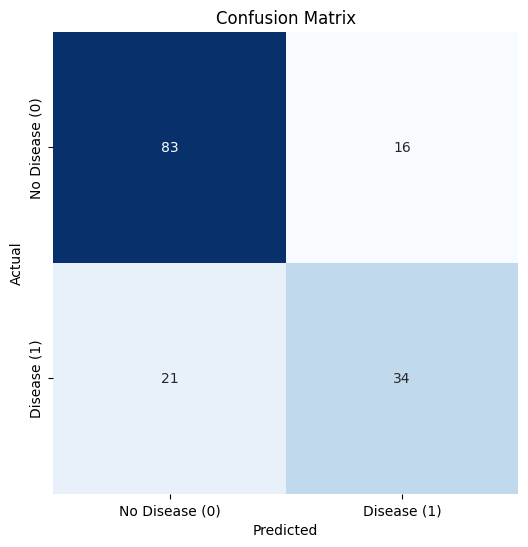

In [34]:
cm = confusion_matrix(y_test, y_re_pred)
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['No Disease (0)', 'Disease (1)'], yticklabels=['No Disease (0)', 'Disease (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [35]:
precision = precision_score(y_test, y_re_pred)
recall = recall_score(y_test, y_re_pred)
print(precision)
print(recall)

0.68
0.6181818181818182


RandomForest

In [28]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [29]:
y_rf_re_pred = rf_model.predict(x_test)

In [30]:
print(accuracy_score(y_test,y_rf_re_pred))

0.7467532467532467


Logistic

In [31]:

log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_resampled,y_resampled)



c:\Users\jyots\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [32]:
y_lr_re_pred = log_reg_model.predict(x_test)

In [33]:
print(accuracy_score(y_test,y_lr_re_pred))

0.7337662337662337


In [39]:
import pickle
filename = 'diabetes_model.sav'
pickle.dump(dt_model, open(filename,'wb'))